# 1. Install and Import Dependencies

In [75]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Defaulting to user installation because normal site-packages is not writeable

ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0)
ERROR: No matching distribution found for torch==1.8.1+cu111

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [76]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [77]:
!cd yolov5 & pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [79]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\91861/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-8-11 Python-3.11.2 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [80]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [81]:
img = 'https://images.pexels.com/photos/860577/pexels-photo-860577.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'

In [82]:
results = model(img)
results.print()

image 1/1: 750x1125 2 persons, 1 frisbee, 1 bowl
Speed: 1020.9ms pre-process, 189.1ms inference, 2.2ms NMS per image at shape (1, 3, 448, 640)


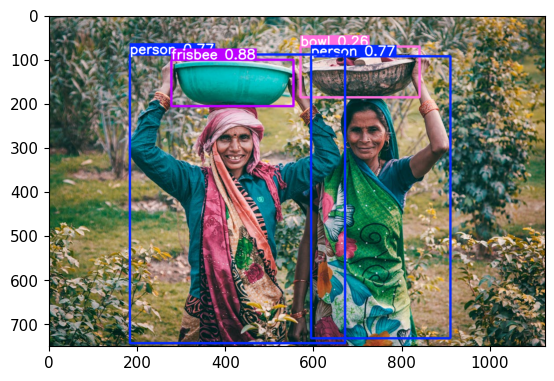

In [83]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [84]:
results.render()

[array([[[ 57,  77,  49],
         [ 42,  64,  41],
         [ 38,  65,  50],
         ...,
         [121,  90,  62],
         [124,  88,  62],
         [126,  89,  62]],
 
        [[ 55,  75,  47],
         [ 45,  67,  44],
         [ 45,  72,  57],
         ...,
         [116,  89,  62],
         [117,  87,  61],
         [120,  86,  59]],
 
        [[ 49,  69,  42],
         [ 58,  80,  57],
         [ 68,  95,  80],
         ...,
         [106,  86,  61],
         [106,  84,  60],
         [108,  82,  57]],
 
        ...,
 
        [[  0,  24,  20],
         [  0,  24,  19],
         [  0,  24,  19],
         ...,
         [218, 191, 184],
         [216, 191, 184],
         [211, 188, 180]],
 
        [[  3,  30,  25],
         [  0,  30,  22],
         [  0,  29,  23],
         ...,
         [212, 185, 176],
         [216, 192, 182],
         [209, 187, 176]],
 
        [[ 13,  40,  33],
         [ 10,  40,  32],
         [  8,  38,  30],
         ...,
         [184, 157, 148],
  

# 4. Real Time Detections

In [85]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [86]:
import uuid   # Unique identifier
import os
import time

In [87]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [88]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [89]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.45c1d176-576b-11ef-a8e9-802e82311bfc.jpg


In [90]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.45c3a010-576b-11ef-a4cb-802e82311bfc.jpg
data\images\awake.45c3a011-576b-11ef-bef0-802e82311bfc.jpg
data\images\awake.45c3a012-576b-11ef-bc76-802e82311bfc.jpg
data\images\awake.45c3a013-576b-11ef-85fb-802e82311bfc.jpg
data\images\awake.45c3a014-576b-11ef-b43e-802e82311bfc.jpg
data\images\drowsy.45c3a015-576b-11ef-831d-802e82311bfc.jpg
data\images\drowsy.45c3a016-576b-11ef-a8ef-802e82311bfc.jpg
data\images\drowsy.45c3a017-576b-11ef-9871-802e82311bfc.jpg
data\images\drowsy.45c3a018-576b-11ef-a3f9-802e82311bfc.jpg
data\images\drowsy.45c3a019-576b-11ef-9d32-802e82311bfc.jpg


In [91]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [92]:
%pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 1

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-350-g6096750f Python-3.11.2 torch-2.0.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2,

# 6. Load Custom Model

In [94]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\91861/.cache\torch\hub\master.zip
YOLOv5  2024-8-11 Python-3.11.2 torch-2.0.0+cpu CPU



Exception: [Errno 2] No such file or directory: 'yolov5\\runs\\train\\exp15\\weights\\last.pt'. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

image 1/1: 480x640 1 awake
Speed: 16.0ms pre-process, 11.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()